EtMINFLUX real-time analysis pipeline runtimes for all experiments in the given folders, as read from .txt log files.

In [5]:
import matplotlib.pyplot as plt
import os
import warnings
import copy
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from itertools import compress

import sys
sys.path.append("..")
import obf_support

# warning suppression
from pandas.errors import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
warnings.filterwarnings('ignore')

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'arial'

parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

[11.844 11.057  8.102 10.598 23.952 18.838 27.126 27.899]
[(143, 143), (143, 143), (143, 143), (143, 143), (214, 214), (214, 214), (214, 214), (214, 214)]
17.427 7.530252203611776 15.341000000000001


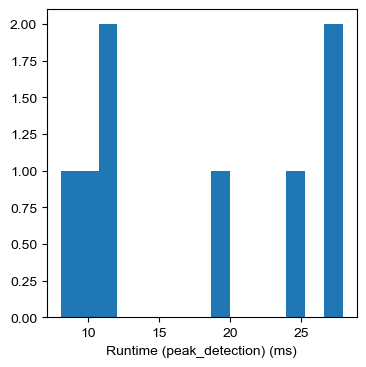

In [10]:
### CAV1 PIPELINE RUNS

folders = [os.path.join(parentdir, 'exampledata\\cav1\\site-sm\\240925'),
           os.path.join(parentdir, 'exampledata\\cav1\\site-dppe\\240925')]

runtimes_all = []
imsize_all = []
for path in folders:
    filelist = os.listdir(path)
    filelist_rois_all = [file for file in filelist if file.endswith('.npy')]
    filelist_conf = [file for file in filelist if 'conf' in file and 'analysis' not in file and '.png' not in file]
    filelist_msr = [file for file in filelist if file.endswith('.msr')]
    filelist_logs = [file for file in filelist if 'log' in file]

    for file_idx in range(len(filelist_conf)):
        curr_img_data = {'confidx': [], 'roiidx': [], 'tridx': [], 'roisize': [], 'roipos': [], 'roipos_px': [], 'tim0': [], 'x': [], 'y': [], 'tim': [], 'pxsize': [], 'inout_flag': [], 'inout_len': [], 'inout_mask': [], 'inout_incl_flag': [], 'inout_incl_len': [], 'inout_incl_mask': [], 'filter': [], 'confimg':[], 'confimg_ext': [], 'conf_xlim': [], 'conf_ylim': [], 'conf_xcorr': [], 'conf_ycorr': []}
        file_conf = os.path.join(path, filelist_conf[file_idx])
        file_msr = os.path.join(path, filelist_msr[file_idx])
        file_log = os.path.join(path, filelist_logs[file_idx])
        
        with open(file_log, 'r') as f:
            text = f.read()
        runtimes_text = text.split('pipeline_runtimes: [')[-1].split(']')[0]
        runtimes = []
        for runtime in runtimes_text.split(', '):
            runtimes.append(float(runtime))
        runtimes_all.append(runtimes)
        
        conf_time = int(filelist_conf[file_idx].split('-')[1].split('_')[0])
        if file_idx > 0:
            conf_date_prev = copy.deepcopy(conf_date)
        else:
            conf_date_prev = 0
        conf_date = int(filelist_conf[file_idx].split('-')[0])
        if file_idx > 0 and conf_date == conf_date_prev:
            conf_time_prev = int(filelist_conf[file_idx-1].split('-')[1].split('_')[0])
        else:
            conf_time_prev = 0
        filelist_rois = [file for file in filelist_rois_all if int(file.split('-')[0])==conf_date and int(file.split('-')[1].split('_')[0])>conf_time_prev and int(file.split('-')[1].split('_')[0])<conf_time]
        image_conf = tifffile.imread(file_conf)[-1]
        
        # get metadata from confocal image in msr file (pixel size, image shape, image size, origin offset)
        msr_dataset = obf_support.File(file_msr)
        conf_msr_stack_index = 0  # in currently used imspector template file, the confocal dataset is always stack 0 in the .msr file. This might change with other templates used.
        conf_stack = msr_dataset.stacks[conf_msr_stack_index]
        pxsize = conf_stack.pixel_sizes[0]*1e6
        pxshift = pxsize/2
        conf_size_px = (conf_stack.shape[0], conf_stack.shape[1])
        conf_size = (conf_stack.lengths[0]*1e6, conf_stack.lengths[1]*1e6)
        imsize_all.append(conf_size_px)

mask = []
for idx,runtimes in enumerate(runtimes_all):
    if idx<len(runtimes_all)-1:
        if runtimes[0] == runtimes_all[idx+1][0]:
            mask.append(False)
        else:
            mask.append(True)
    else:
        mask.append(True)
runtimes_all = np.concatenate(list(compress(runtimes_all, mask)))
print(runtimes_all)
print(imsize_all)

plt.figure(figsize=(4,4))
plt.hist(runtimes_all, bins=15)
plt.xlabel('Runtime (peak_detection) (ms)')

print(np.mean(runtimes_all), np.std(runtimes_all), np.median(runtimes_all))

['c:\\Users\\alvelidjonatan\\Documents\\GitHub\\etMINFLUX-analysis-public\\exampledata\\dyn1\\241101\\sample1\\cell2\\e1', 'c:\\Users\\alvelidjonatan\\Documents\\GitHub\\etMINFLUX-analysis-public\\exampledata\\dyn1\\241101\\sample1\\cell2\\e2', 'c:\\Users\\alvelidjonatan\\Documents\\GitHub\\etMINFLUX-analysis-public\\exampledata\\dyn1\\241121\\sample2\\cell3\\e1', 'c:\\Users\\alvelidjonatan\\Documents\\GitHub\\etMINFLUX-analysis-public\\exampledata\\dyn1\\241121\\sample2\\cell3\\e2']
[ 6.017  6.392  7.442  8.413 10.166 10.477 10.954 12.586 13.625 14.614
 22.734 23.383 30.163 24.842 26.846 28.982 29.867 28.127 28.417 31.411
 28.538 33.341 28.072 27.906 87.559 28.545 28.858 28.854 27.422 28.325
 27.724 31.328 26.473 27.317 25.482 27.088 25.894 26.416 26.05  26.601
 26.234 26.098 26.853 25.677 27.695 25.844 26.47  32.371 26.87  27.511
 33.744 25.749 33.183  6.143  6.803  7.506  8.684 10.326 10.51  11.553
 12.553 13.472 14.503 21.517 23.592 28.083 24.536 25.261 26.737 26.954
 26.364 27.561

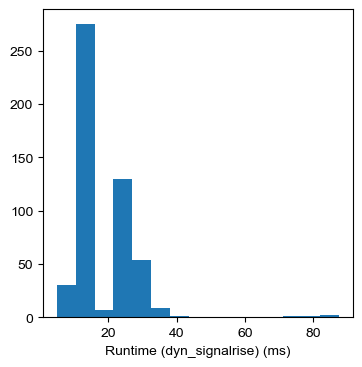

In [11]:
### DYNAMIN1 PIPELINE RUNS

eventfolders_all = []
topfolders = [os.path.join(parentdir, 'exampledata\\dyn1\\241101'),
              os.path.join(parentdir, 'exampledata\\dyn1\\241121')]
for topfolder in topfolders:
    samplefolders = os.listdir(topfolder)
    for samplefolder in samplefolders:
        if os.path.isdir(os.path.join(topfolder,samplefolder)):
            cellfolders = os.listdir(os.path.join(topfolder,samplefolder))
            for cellfolder in cellfolders:
                eventfolders = os.listdir(os.path.join(topfolder,samplefolder,cellfolder))
                for eventfolder in eventfolders:
                    if 'nomfx' not in eventfolder:
                        eventfolders_all.append(os.path.join(topfolder,samplefolder,cellfolder, eventfolder))
print(eventfolders_all)
runtimes_all = []
imsize_all = []
for path in eventfolders_all:
    filelist = os.listdir(path)
    filelist_npy = [file for file in filelist if file.endswith('.npy')]
    filelist_conf = [file for file in filelist if 'conf' in file and 'analysis' not in file and 'stack' not in file]
    filelist_msr = [file for file in filelist if file.endswith('.msr')]
    filelist_logs = [file for file in filelist if file.endswith('.txt')]

    for file_idx in range(len(filelist_msr)):
        curr_img_data = {'confidx': [], 'roiidx': [], 'tridx': [], 'roisize': [], 'roipos': [], 'roipos_px': [], 'tim0': [], 'x': [], 'y': [], 'tim': [], 'pxsize': [], 'inout_flag': [], 'inout_len': [], 'inout_mask': [], 'inout_incl_flag': [], 'inout_incl_len': [], 'inout_incl_mask': [], 'filter': [], 'confimg':[], 'confimg_ext': [], 'conf_xlim': [], 'conf_ylim': [], 'conf_xcorr': [], 'conf_ycorr': []}
        file_conf = os.path.join(path, filelist_conf[file_idx])
        file_msr = os.path.join(path, filelist_msr[file_idx])
        file_log = os.path.join(path, filelist_logs[file_idx])
        
        with open(file_log, 'r') as f:
            text = f.read()
        runtimes_text = text.split('pipeline_runtimes: [')[-1].split(']')[0]
        runtimes = []
        for runtime in runtimes_text.split(', '):
            runtimes.append(float(runtime))
        runtimes_all.append(runtimes)
        
        conf_time = int(filelist_conf[file_idx].split('-')[1].split('_')[0])
        if file_idx > 0:
            conf_date_prev = copy.deepcopy(conf_date)
        else:
            conf_date_prev = 0
        conf_date = int(filelist_conf[file_idx].split('-')[0])
        if file_idx > 0 and conf_date == conf_date_prev:
            conf_time_prev = int(filelist_conf[file_idx-1].split('-')[1].split('_')[0])
        else:
            conf_time_prev = 0
        filelist_rois = [file for file in filelist_rois_all if int(file.split('-')[0])==conf_date and int(file.split('-')[1].split('_')[0])>conf_time_prev and int(file.split('-')[1].split('_')[0])<conf_time]
        image_conf = tifffile.imread(file_conf)[-1]
        
        # get metadata from confocal image in msr file (pixel size, image shape, image size, origin offset)
        msr_dataset = obf_support.File(file_msr)
        conf_msr_stack_index = 0  # in currently used imspector template file, the confocal dataset is always stack 0 in the .msr file. This might change with other templates used.
        conf_stack = msr_dataset.stacks[conf_msr_stack_index]
        pxsize = conf_stack.pixel_sizes[0]*1e6
        pxshift = pxsize/2
        conf_size_px = (conf_stack.shape[0], conf_stack.shape[1])
        conf_size = (conf_stack.lengths[0]*1e6, conf_stack.lengths[1]*1e6)
        imsize_all.append(conf_size_px)

mask = []
for idx,runtimes in enumerate(runtimes_all):
    if idx<len(runtimes_all)-1:
        if runtimes[0] == runtimes_all[idx+1][0]:
            mask.append(False)
        else:
            mask.append(True)
    else:
        mask.append(True)
runtimes_all = np.concatenate(list(compress(runtimes_all, mask)))
print(runtimes_all)
print(imsize_all)

plt.figure(figsize=(4,4))
plt.hist(runtimes_all, bins=15)
plt.xlabel('Runtime (dyn_signalrise) (ms)')

print(np.mean(runtimes_all), np.std(runtimes_all), np.median(runtimes_all))

['c:\\Users\\alvelidjonatan\\Documents\\GitHub\\etMINFLUX-analysis-public\\exampledata\\gag\\250117\\sample2\\e1', 'c:\\Users\\alvelidjonatan\\Documents\\GitHub\\etMINFLUX-analysis-public\\exampledata\\gag\\241114\\sample3\\e2']
[ 5.371  5.098  5.177  5.928  6.623  7.664  8.258  8.846  9.842 10.836
 20.807 75.093 16.122 18.74  66.636 50.221 58.857 49.509 61.267 65.541
 57.458 60.795 36.411 59.725 68.916 60.012 32.361 20.823  4.74   5.832
  6.706  8.403  8.673  9.807 11.784 12.074 54.104 20.312 20.785 22.318
 33.065]
[(200, 200), (250, 250)]
28.574146341463415 23.38840479608247 20.312


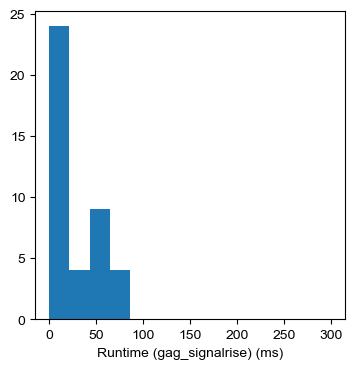

In [12]:
### GAG PIPELINE RUNS

topfolders = [os.path.join(parentdir, 'exampledata\\gag\\250117'),
              os.path.join(parentdir, 'exampledata\\gag\\241114')]
eventfolders_all = []
for topfolder in topfolders:
    samplefolders = os.listdir(topfolder)
    for samplefolder in samplefolders:
        if 'confocal' not in samplefolder:
            if os.path.isdir(os.path.join(topfolder, samplefolder)):
                eventfolders = os.listdir(os.path.join(topfolder, samplefolder))
                for eventfolder in eventfolders:
                    if os.path.isdir(os.path.join(topfolder, samplefolder, eventfolder)):
                        if 'nomfx' not in eventfolder:
                            if 'manual' not in eventfolder:
                                if any(filename.endswith('.npy') for filename in os.listdir(os.path.join(topfolder, samplefolder, eventfolder))):
                                    eventfolders_all.append(os.path.join(topfolder, samplefolder, eventfolder))
print(eventfolders_all)
runtimes_all = []
imsize_all = []
for path in eventfolders_all:
    filelist = os.listdir(path)
    filelist_npy = [file for file in filelist if file.endswith('.npy')]
    filelist_conf = [file for file in filelist if 'conf' in file and 'analysis' not in file and 'stack' not in file]
    filelist_msr = [file for file in filelist if file.endswith('.msr')]
    filelist_logs = [file for file in filelist if file.endswith('.txt')]

    for file_idx in range(len(filelist_msr)):
        curr_img_data = {'confidx': [], 'roiidx': [], 'tridx': [], 'roisize': [], 'roipos': [], 'roipos_px': [], 'tim0': [], 'x': [], 'y': [], 'tim': [], 'pxsize': [], 'inout_flag': [], 'inout_len': [], 'inout_mask': [], 'inout_incl_flag': [], 'inout_incl_len': [], 'inout_incl_mask': [], 'filter': [], 'confimg':[], 'confimg_ext': [], 'conf_xlim': [], 'conf_ylim': [], 'conf_xcorr': [], 'conf_ycorr': []}
        file_conf = os.path.join(path, filelist_conf[file_idx])
        file_msr = os.path.join(path, filelist_msr[file_idx])
        file_log = os.path.join(path, filelist_logs[file_idx])
        
        with open(file_log, 'r') as f:
            text = f.read()
        runtimes_text = text.split('pipeline_runtimes: [')[-1].split(']')[0]
        runtimes = []
        for runtime in runtimes_text.split(', '):
            runtimes.append(float(runtime))
        runtimes_all.append(runtimes)
        
        conf_time = int(filelist_conf[file_idx].split('-')[1].split('_')[0])
        if file_idx > 0:
            conf_date_prev = copy.deepcopy(conf_date)
        else:
            conf_date_prev = 0
        conf_date = int(filelist_conf[file_idx].split('-')[0])
        if file_idx > 0 and conf_date == conf_date_prev:
            conf_time_prev = int(filelist_conf[file_idx-1].split('-')[1].split('_')[0])
        else:
            conf_time_prev = 0
        filelist_rois = [file for file in filelist_rois_all if int(file.split('-')[0])==conf_date and int(file.split('-')[1].split('_')[0])>conf_time_prev and int(file.split('-')[1].split('_')[0])<conf_time]
        image_conf = tifffile.imread(file_conf)[-1]
        
        # get metadata from confocal image in msr file (pixel size, image shape, image size, origin offset)
        msr_dataset = obf_support.File(file_msr)
        conf_msr_stack_index = 0  # in currently used imspector template file, the confocal dataset is always stack 0 in the .msr file. This might change with other templates used.
        conf_stack = msr_dataset.stacks[conf_msr_stack_index]
        pxsize = conf_stack.pixel_sizes[0]*1e6
        pxshift = pxsize/2
        conf_size_px = (conf_stack.shape[0], conf_stack.shape[1])
        conf_size = (conf_stack.lengths[0]*1e6, conf_stack.lengths[1]*1e6)
        imsize_all.append(conf_size_px)

mask = []
for idx,runtimes in enumerate(runtimes_all):
    if idx<len(runtimes_all)-1:
        if runtimes[0] == runtimes_all[idx+1][0]:
            mask.append(False)
        else:
            mask.append(True)
    else:
        mask.append(True)
runtimes_all = np.concatenate(list(compress(runtimes_all, mask)))
print(runtimes_all)
print(imsize_all)

plt.figure(figsize=(4,4))
plt.hist(runtimes_all, bins=np.linspace(0,300,15))
plt.xlabel('Runtime (gag_signalrise) (ms)')

print(np.mean(runtimes_all), np.std(runtimes_all), np.median(runtimes_all))